In [1]:
# git clone repo để lấy data
!git clone https://github.com/lamtai2508/LNHONGTAI_DATA_ANALYTICS_SGU_2025.git

Cloning into 'LNHONGTAI_DATA_ANALYTICS_SGU_2025'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 54 (delta 13), reused 37 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 22.93 MiB | 10.13 MiB/s, done.
Resolving deltas: 100% (13/13), done.


# BAYES NGÂY THƠ (NAÏVE BAYES)



2.3.3 Bài thực hành số 1: Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng

Dữ liệu lấy từ
https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

Bước 1: import những thư viện sẽ sử dụng

In [9]:
# Import thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Bước 2: chuẩn bị dữ liệu

In [10]:
# Đọc dữ liệu
df = pd.read_csv('/content/LNHONGTAI_DATA_ANALYTICS_SGU_2025/Data_Sets/Customer_Behaviour.csv')  # đổi tên file theo dataset Kaggle

# Kiểm tra dữ liệu bị thiếu
print(df.isnull().sum())

# Chuyển đổi dữ liệu dạng chữ thành số
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

print(" Sau khi mã hóa:")
print(df.head())

# Giả sử cột mục tiêu là 'Purchased'
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
 Sau khi mã hóa:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


Bước 3: Xây dựng mô hình Naïve Bayes

In [13]:
# Xây dựng mô hình Naïve Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

Bước 4: Đánh giá hiệu quả của mô hình

🎯 Accuracy: 0.925

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        52
           1       0.96      0.82      0.88        28

    accuracy                           0.93        80
   macro avg       0.93      0.90      0.91        80
weighted avg       0.93      0.93      0.92        80



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


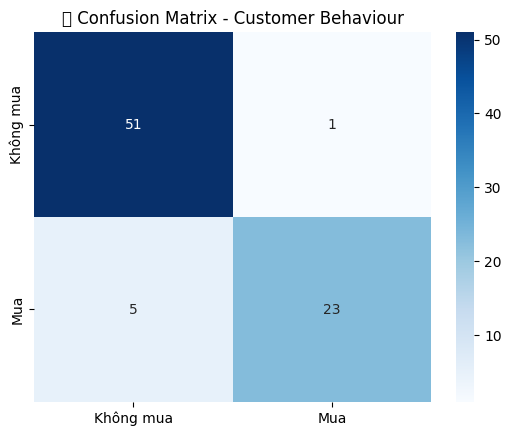

In [16]:
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Không mua', 'Mua'],
            yticklabels=['Không mua', 'Mua'])
plt.title("📊 Confusion Matrix - Customer Behaviour")
plt.show()